In [1]:
import numpy as np
import pandas as pd

from sklearn import linear_model
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
sns.set()

# Start Reading Data

In [2]:
#read csv file
portfolio = pd.read_csv('https://goz39a.s3.eu-central-1.amazonaws.com/Portfolio.csv',parse_dates=True,index_col='T')


In [3]:
portfolio.head()

,DAX,NKY,SPX,SX5E,SX7E,SXAP,SXKP,PORTFOLIO
T,,,,,,,,
2014-10-08,-0.00437,-0.00520,0.00752,-0.00408,-0.00456,-0.00751,-0.00297,-0.00325
2014-10-09,0.00047,-0.00327,-0.00907,-0.00155,-0.00464,0.00024,-0.00558,-0.00562
2014-10-14,0.00179,-0.01046,-0.00653,0.00138,0.00075,0.01232,-0.00130,-0.01723
2014-10-15,-0.01265,0.00397,-0.00353,-0.01598,-0.02159,-0.01331,-0.01484,-0.00118
2014-10-16,0.00055,-0.00976,0.00006,-0.00270,-0.00929,0.00638,-0.00521,-0.00183


In [4]:
#the last column is the target
y = portfolio.values[:,-1]

#create the design / feature matrix
X = portfolio.values[:,0:-1]

futures_names = portfolio.columns[:-1]


# Train OLS Regression

Set up the ordinary least squares regression (fit_intercept=True)

In [5]:
ols_model = linear_model.LinearRegression(fit_intercept=True)
ols_model.fit(X,y)
coef = ols_model.coef_
intercept = ols_model.intercept_

# R Squared

In [6]:
print('R Squared:',ols_model.score(X,y))
Y = ols_model.predict(X)

R Squared: 0.5721537153344336


# Graphical Output

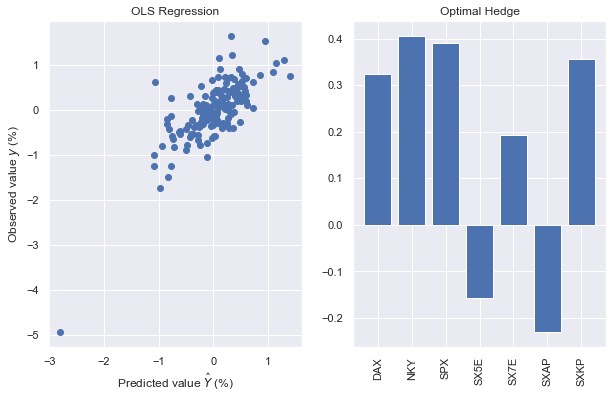

In [7]:
fig , ax = plt.subplots(1,2,figsize=(10,6))
ax[0].scatter(100*Y,100*y)
ax[0].set_xlabel('Predicted value $\hat{Y}$ (%)')
ax[0].set_ylabel('Observed value $y$ (%)')
ax[0].set_title('OLS Regression')

ax[1].bar(np.arange(0,len(futures_names)),coef)
ax[1].set_xticks(np.arange(0,len(futures_names)))
ax[1].set_xticklabels(futures_names,rotation=90);
ax[1].set_title('Optimal Hedge');